In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dft = pd.read_excel('descriptors.xlsx', sheet_name='DFT_data')
xtb = pd.read_excel('descriptors.xlsx', sheet_name='XTB_data_noNi')

In [5]:
dft.head()

,ID,smiles,vmin_vmin_boltz,vmin_r_boltz,fmo_e_homo_boltz,fmo_e_lumo_boltz,fmo_mu_boltz,fmo_eta_boltz,fmo_omega_boltz,somo_ra_boltz,...,sterimol_burB5_boltz,sterimol_burB5_min,sterimol_burB5_max,sterimol_burB5_delta,sterimol_burB5_vburminconf,sterimol_burL_boltz,sterimol_burL_min,sterimol_burL_max,sterimol_burL_delta,sterimol_burL_vburminconf
0,1,CC(C)c1cc(C(C)C)c(-c2ccccc2P(C2CCCCC2)C2CCCCC2...,-0.061654,1.819048,-0.218243,-0.025112,-0.121678,0.193131,0.038336,0.059115,...,7.439480,6.306577,7.835474,1.528897,7.262693,7.291573,7.106519,8.238802,1.132283,7.735548
1,2,CN(C)c1cccc(N(C)C)c1-c1ccccc1P(C1CCCCC1)C1CCCCC1,-0.063670,1.784157,-0.206310,-0.023277,-0.114794,0.183033,0.036033,0.061658,...,6.572514,6.339063,7.850955,1.511892,6.407769,7.285463,6.908743,8.216943,1.308200,7.992698
2,3,COc1cccc(OC)c1-c1ccccc1P(C1CCCCC1)C1CCCCC1,-0.066303,1.798595,-0.213323,-0.016923,-0.115123,0.196400,0.033750,0.069846,...,7.156276,6.349086,7.287324,0.938238,7.021625,7.306643,7.025374,8.361404,1.336030,7.424874
3,4,CC(C)Oc1cccc(OC(C)C)c1-c1ccccc1P(C1CCCCC1)C1CC...,-0.067319,1.795292,-0.211571,-0.013802,-0.112687,0.197770,0.032124,0.070775,...,7.238774,6.369287,7.813010,1.443723,7.653520,7.338674,6.996319,8.333428,1.337110,7.483233
4,5,c1ccc(-c2ccccc2P(C2CCCCC2)C2CCCCC2)cc1,-0.061351,1.816461,-0.218842,-0.030145,-0.124494,0.188697,0.041069,0.060353,...,6.497622,6.092458,7.055260,0.962802,6.376705,7.370445,7.021018,8.155038,1.134020,8.086289


In [20]:
smiles = []
dft_E = []
xtb_cone = []


for i in range(len(xtb['smiles'])):
    xtb_smiles = xtb['smiles'][i]
    for j in range(len(dft['smiles'])):
        dft_smiles = dft['smiles'][j]
        if xtb_smiles == dft_smiles:
            xtb_cone.append(xtb['cone_angle_boltz'][i])
            dft_E.append(dft['nbo_bds_e_min_boltz'][j])
            smiles.append(xtb_smiles)

print('dft_E: ', dft_E, '/nlength:', len(dft_E))
print('')
print('xtb_cone: ', xtb_cone, '/nlength:', len(xtb_cone))
print('')
print('smiles: ', smiles, '/nlength:', len(smiles))
        


dft_E:  [0.180203506, 0.204297664, 0.180130331, 0.182776371, 0.171740067, 0.237072704, 0.194500493, 0.185369208, 0.237139844, 0.17914127, 0.243254217, 0.181126777, 0.210056807, 0.19052412, 0.200465928, 0.21156286, 0.200827393, 0.204148225, 0.205266953, 0.199374259, 0.207499718, 0.201928825, 0.213665143, 0.186825299, 0.226128024, 0.21133822, 0.212814657, 0.204257092, 0.197825577, 0.29396495, 0.1909135, 0.199623077, 0.23618287, 0.205823837, 0.203262057, 0.237101081, 0.181330501, 0.178765166, 0.205247681, 0.206344764, 0.182375, 0.211803397, 0.199658052, 0.197571943, 0.241132875, 0.213974405, 0.210560779, 0.189079455, 0.208969864, 0.209089538, 0.204507488, 0.208969592, 0.229646997, 0.194841673, 0.1888146, 0.130758038, 0.19772767, 0.208195261, 0.180882472, 0.200346151, 0.179650997, 0.246222233, 0.203063797, 0.186673689, 0.198043769, 0.22744125, 0.209265665, 0.233862759, 0.236748704, 0.207316702, 0.195997093, 0.198188389, 0.231252281, 0.237268531, 0.201368194, 0.202645179, 0.184845267, 0.198

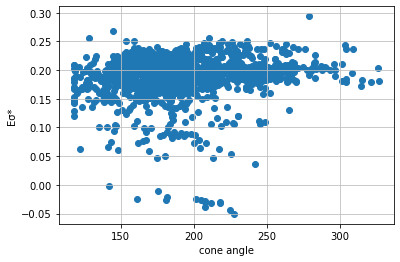

In [19]:
plt.scatter(xtb_cone,dft_E)
plt.xlabel('cone angle')
plt.ylabel('Eσ*')
plt.grid(True,linestyle='-',color='0.75')

In [21]:
print('smiles:', smiles[400], '\ncone angle:', xtb_cone[400], '\nE:', dft_E[400])

smiles: Cc1cc(OC(C)C)ccc1P(c1ccc(OC(C)C)cc1C)c1ccc(OC(C)C)cc1C 
cone angle: 210.364124689086 
E: 0.244469847


In [24]:
df = pd.DataFrame({
    'smiles': smiles,
    'cone_angle_boltz': xtb_cone,
    'nbo_bds_e_min_boltz': dft_E
})

df.head()

,smiles,cone_angle_boltz,nbo_bds_e_min_boltz
0,COc1c(C)c(C)c(-c2c(C(C)C)cc(C(C)C)cc2C(C)C)c(P...,326.733246,0.180204
1,CCCCc1c(F)c(F)c(-c2c(C(C)C)cc(C(C)C)c(-c3cccc(...,326.174700,0.204298
2,Cc1c(C)c(C)c(P(C(C)(C)C)C(C)(C)C)c(-c2c(C(C)C)...,321.651879,0.180130
3,COc1cccc(OC)c1-c1cccc2c1P(C(C)(C)C)[C@@H](Cc1c...,315.472306,0.182776
4,c1ccc(-c2ccccc2OP(Oc2ccccc2-c2ccccc2)Oc2ccccc2...,314.796185,0.171740
